# HEART DISEASE PREDICTION USING MACHINE LEARNING

MACHINE LEARNING ALGORITHMS : 

1. LOGISTIC REGRESSION 
2. DECISION TREE
3. RANDOM FOREST
4. K-NEAREST NEIGHBOURS 
5. SUPPORT VECTOR MACHINE
6. ADABooST

IMPORTING THE DEPENDENCIES

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


DATA COLLECTION AND PROCESSING

In [2]:
#loading the csv data to a pandas DataFrame

heart_data=pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\DATA ANALYSIS PROJECT\heart_disease_data.csv")

In [3]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
#print first 5 rows of the data set

heart_data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#print last 5 rows of the data set

heart_data.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
#to check number of rows and columns in the data set
heart_data.shape

(303, 14)

In [7]:
# getting information about the data

heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# to check for missing values

heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

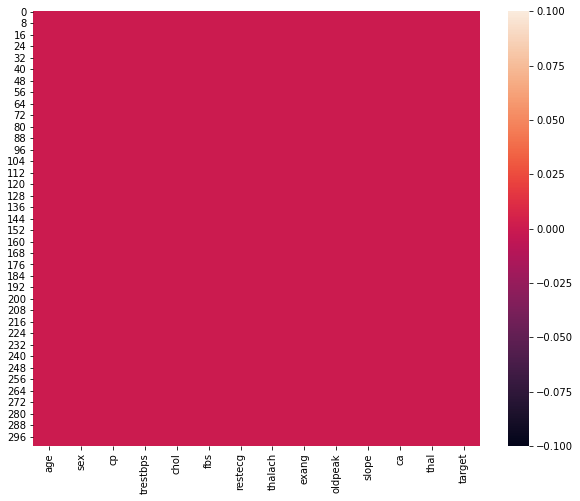

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(heart_data.isnull())

<AxesSubplot:>

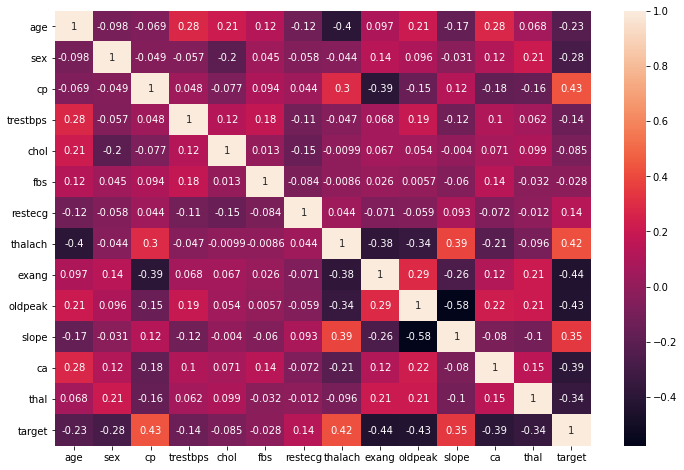

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(heart_data.corr(),annot=True)

<AxesSubplot:xlabel='target', ylabel='count'>

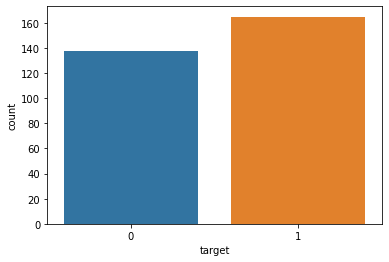

In [11]:
sns.countplot(x="target",data=heart_data)

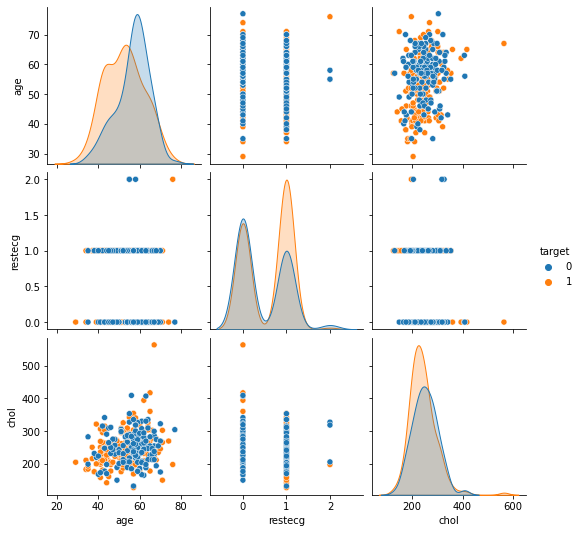

In [15]:
sns.pairplot(heart_data, hue = 'target', vars = ['age', 'restecg', 'chol'] )

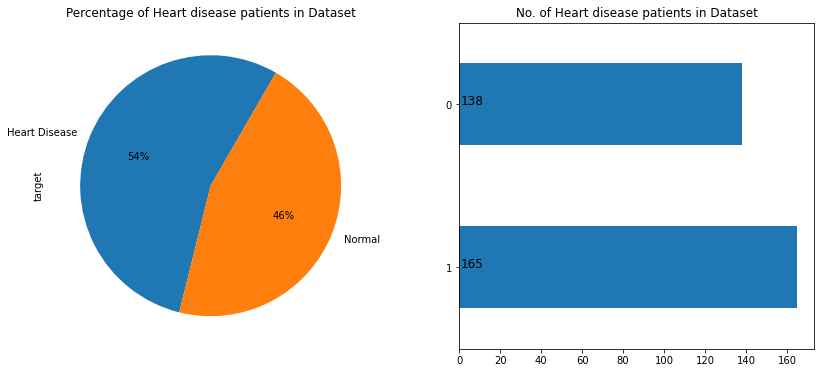

In [17]:
# Plotting attrition of employees
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = heart_data['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = heart_data["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(heart_data["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


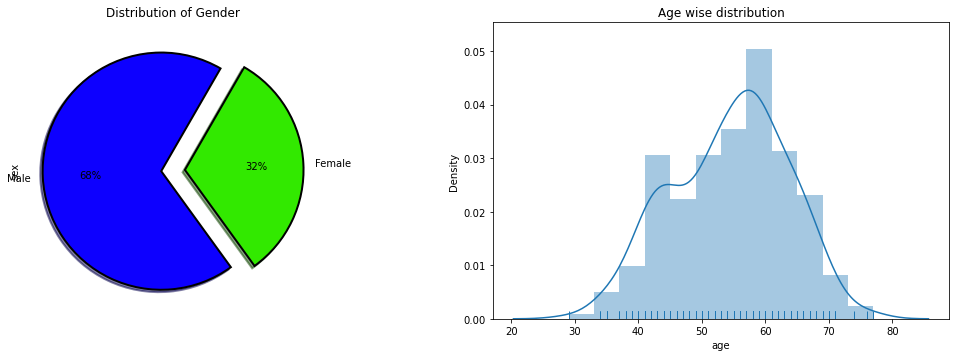

In [18]:
plt.figure(figsize=(18,12))
plt.subplot(221)
heart_data["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(heart_data['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


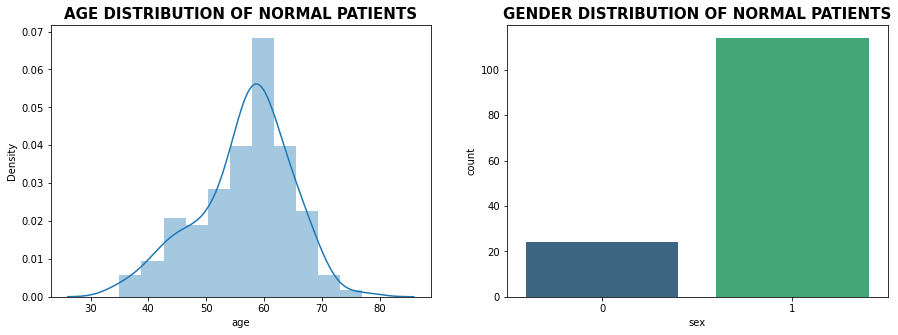

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


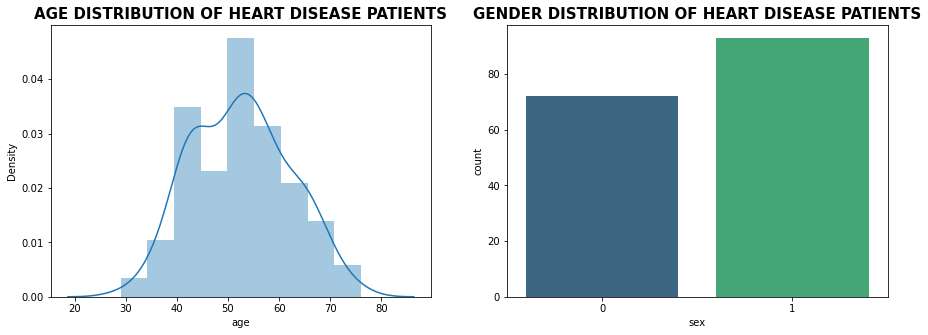

In [21]:
# creating separate df for normal and heart patients

attr_1=heart_data[heart_data['target']==1]

attr_0=heart_data[heart_data['target']==0]

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

#plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


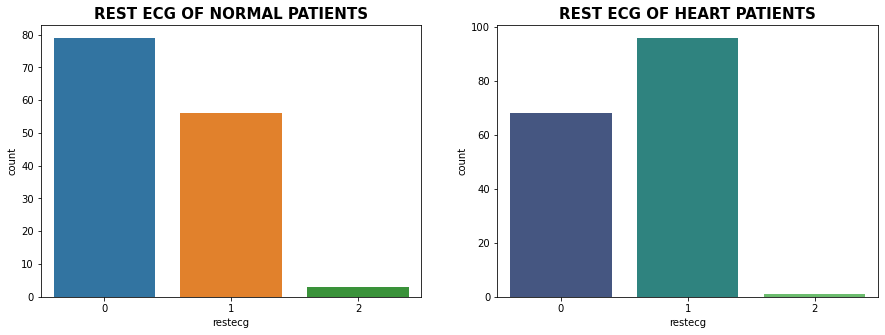

In [25]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['restecg'])
plt.title('REST ECG OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['restecg'], palette='viridis')
plt.title('REST ECG OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [27]:
#Exploring the Heart Disease patients based on REST ECG
plot_criteria= ['restecg', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(heart_data[plot_criteria[0]], heart_data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
restecg,,
0,57.250000,41.210000
1,40.580000,58.180000
2,2.170000,0.610000


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


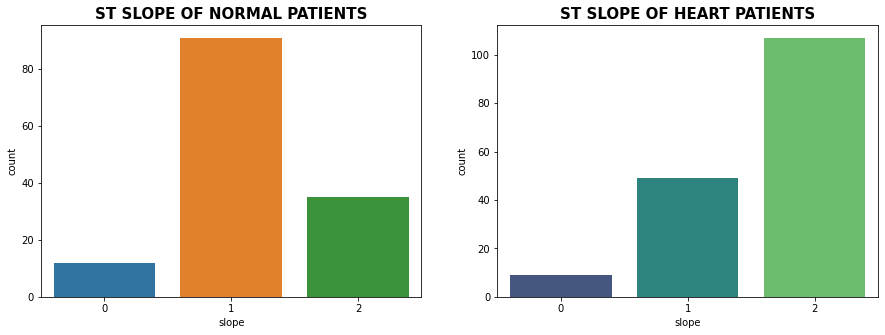

In [29]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['slope'])
plt.title('ST SLOPE OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['slope'], palette='viridis')
plt.title('ST SLOPE OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [12]:
heart_data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

IndexError: index 10 is out of bounds for axis 0 with size 10

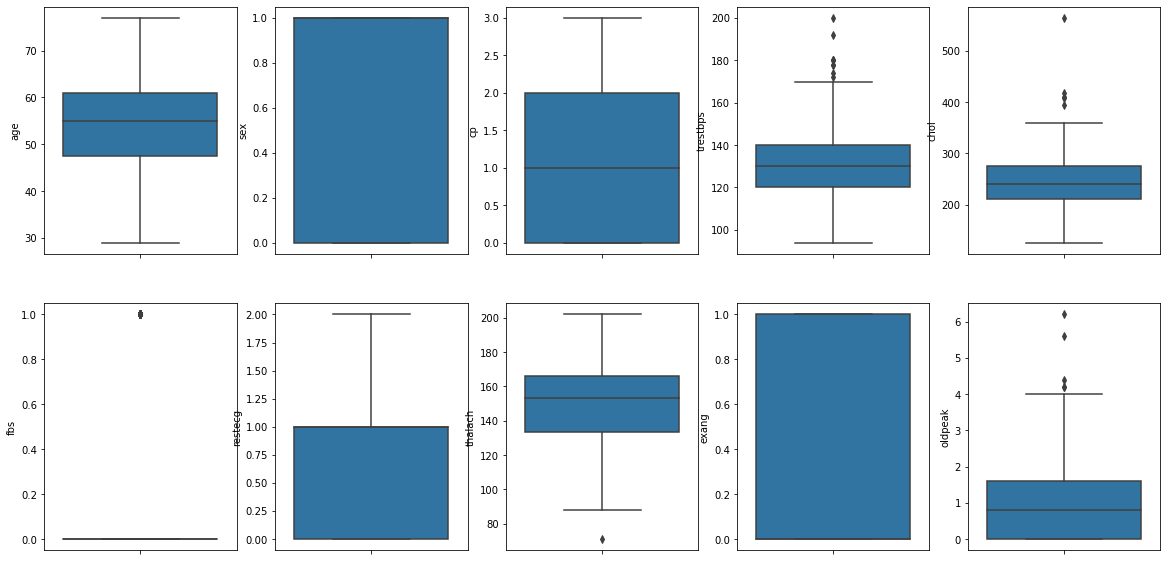

In [33]:
#visualization dataset also checking for outliers

fig, ax=plt.subplots(ncols=5,nrows=2,figsize=(20,10))
ax=ax.flatten()

index=0

for col,values in heart_data.items():
    sns.boxplot(y=col,data=heart_data,ax=ax[index])
    index +=1

In [ ]:
sns.pairplot(heart_data)

In [ ]:
heart_data.isnull().mean().plot.bar(figsize=(12,8))
plt.xlabel("FEATURES")
plt.ylabel("PERCENTAGE OF MISSING VALUES")

In [ ]:
#to get the statistical measures about the data

heart_data.describe()

In [ ]:
x=heart_data.drop("target",axis=1)
y=heart_data["target"]

In [ ]:
x.shape,y.shape

In [ ]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

In [ ]:
# checking the distribution of target variable 
heart_data['target'].value_counts()

DEFECTIVE HEART ( REPRESENTED BY 1)

HEALTHY HEART   ( REPRESENTED BY 0)

SPLITTING THE FEATURES AND TARGET

In [ ]:
X = heart_data.drop(columns='target',axis=1)
Y = heart_data['target'] 

In [ ]:
print(X)

In [ ]:
print(Y)

SPLITTING THE DATA INTO TRAINING DATA AND TEST DATA

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape,x_test.shape

# MODEL TRAINING

# LOGISTIC REGRESSION 

In [ ]:
from sklearn.linear_model import LogisticRegression

#object
model_lr=LogisticRegression()

In [ ]:
x_train.shape,x_test.shape

In [ ]:
#Training of the model

model_lr.fit(x_train,y_train)

In [ ]:
#making prediction
pred_lr=model_lr.predict(x_test)

In [ ]:
#accuracy score

accuracy_score_lr=accuracy_score(y_test,pred_lr)
accuracy_score_lr*100

In [ ]:
cm1=confusion_matrix(y_test,pred_lr)
cm1

# DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#creating the model object
model_dt=DecisionTreeClassifier(max_depth=4)

In [ ]:
#Training of decision tree

model_dt.fit(x_train,y_train)

In [ ]:
#Making prediction using Decision Tree

pred_dt=model_dt.predict(x_test)

In [ ]:
accuracy_score_dt=accuracy_score(y_test,pred_dt)
accuracy_score_dt*100

In [ ]:
#confusion matrix

cm2=confusion_matrix(y_test,pred_dt)
cm2

# RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#creating the model object
model_rf=RandomForestClassifier(max_depth=4)

In [ ]:
#training the model

model_rf.fit(x_train,y_train)

In [ ]:
#making predictions

pred_rf = model_rf.predict(x_test)

In [ ]:
accuracy_score_rf=accuracy_score(y_test,pred_dt)
accuracy_score_rf*100

In [ ]:
cm3=confusion_matrix(y_test,pred_rf)
cm3

# K-NEIGHBOURS (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#creating model object
model_knn=KNeighborsClassifier()

In [ ]:
for i in range(4,12):
    model_knn=KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(x_train,y_train)
    pred_knn=model_knn.predict(x_test)
    accuracy_score_knn=accuracy_score(y_test,pred_knn)
    print(i,accuracy_score_knn)

In [ ]:
model_knn=KNeighborsClassifier(n_neighbors=11)
model_knn.fit(x_train,y_train)
pred_knn=model_knn.predict(x_test)
accuracy_score_knn=accuracy_score(y_test,pred_knn)
print(accuracy_score_knn)

In [ ]:
model_knn=KNeighborsClassifier(n_neighbors=11)
model_knn.fit(x_train,y_train)
pred_knn=model_knn.predict(x_test)
accuracy_score_knn=accuracy_score(y_test,pred_knn)
print(accuracy_score_knn*100)

# SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC

#creating object of model
model_svm=SVC(kernel="rbf")

In [ ]:
#model training

model_svm.fit(x_train,y_train)

In [ ]:
#make prediction

pred_svm=model_svm.predict(x_test)

In [ ]:
accuracy_score_svm=accuracy_score(y_test,pred_svm)
accuracy_score_svm*100

# ADABOOST CLASSIFIER

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

#making object of model
model_ada=AdaBoostClassifier(n_estimators=200,learning_rate=0.03)

In [ ]:
#Training of the model
model_ada.fit(x_train,y_train)

In [ ]:
#making prediction
pred_ada=model_ada.predict(x_test)

In [ ]:
#accuracy check 
accuracy_score_ada=accuracy_score(y_test,pred_ada)
accuracy_score_ada*100

In [ ]:
import pandas as pd

data1 = {
  "MODEL": ["Logistic Regression","Decision Tree","Random Forest","KNN ","SVM","AdaBoost"],
  "ACCURATE SCORE": [accuracy_score_lr,accuracy_score_dt,accuracy_score_rf,accuracy_score_knn,accuracy_score_svm,accuracy_score_ada]
}

#load data into a DataFrame object:
df = pd.DataFrame(data1)

print(df) 

In [ ]:
sns.barplot(x="ACCURATE SCORE",y="MODEL",data=data1)
data1.sort_values(by="ACCURATE SCORE",ascending=False)